<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/unibo-intensive-program-2023/blob/main/1-notebooks/chapter-2-5.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Recurrent Neural Network Application to Finance

## What is a Recurrent Neural Network

A **recurrent neural network (RNN)** is a type of artificial neural network that is designed to process sequential data, such as time series or natural language. The key feature of RNNs is their ability to maintain an internal state or memory that allows them to process and make predictions based on previous inputs. This memory is passed from one step to the next in the sequence, allowing the network to maintain a "context" of the previous inputs as it processes the current input.

RNNs are especially useful for tasks where context is important, such as predicting the next word in a sentence or the next value in a time series. They can also be used for tasks such as image or speech recognition, where the input can be interpreted as a sequence of features.

The basic structure of an RNN includes a series of repeating "cells", each of which contains a set of weights that are shared across all the time steps in the sequence. Each cell takes as input the current input value and the previous state of the network, and produces an output value and a new state, which are then passed to the next cell in the sequence.



The most common type of RNN is the **Long Short-Term Memory (LSTM)** network, which adds a gating mechanism to the basic RNN cell that allows it to selectively "forget" or "remember" information from previous inputs, thus preventing the problem of vanishing gradients that can occur in standard RNNs.

Overall, RNNs are a powerful and flexible tool for processing sequential data, and have been used successfully in a wide range of applications, including natural language processing, speech recognition, music composition, and financial time series forecasting.

## Import Library

In [83]:
import numpy    as np
import pandas   as pd
import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

## Download Stock Prices

In [84]:
# Define a list of tickers to download
#tickers = ["AAPL", "MSFT", "AMZN"]
tickers = ["AAPL"]

# Define start and end dates
start_date = "2020-01-01"
end_date = "2021-12-31"

# Download the stock data for the specified tickers and dates
data = yf.download(tickers, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv("stock_prices.csv")

[*********************100%***********************]  1 of 1 completed


## A Simple Application of Stock Price Forecasting

Here's a brief overview of what the following code does:

- The historical stock price data is loaded from a CSV file using pandas.

- The closing price data is extracted and normalized between 0 and 1 using a MinMaxScaler.

- The data is split into training and testing sets, and input and output arrays are created for the RNN model.

- The architecture of the RNN model is defined, with three LSTM layers followed by a single dense output layer.

- The model is compiled and trained on the training set.

- The model is used to predict stock prices on the test set, and the mean squared error (MSE) of the predictions is computed.

The idea behind the RNN is that it uses the past price data to predict future prices. The LSTM layers are particularly suited for this task, as they are able to learn long-term dependencies in the time series data.

Note that the above code is just a basic example and can be further optimized by adding more features or tuning the hyperparameters to improve the model's performance.

In [85]:
# Load the historical stock price data
df = pd.read_csv('stock_prices.csv')

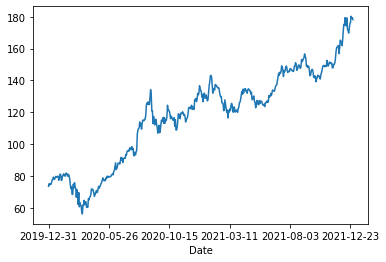

In [86]:
# Set the date column as the index
df.set_index('Date', inplace=True)

# Plot the 'Close' column
df['Close'].plot()

# Show the plot
plt.show()

In [87]:
# Extract the closing price column as a numpy array
prices = df['Close'].values.reshape(-1, 1)

In [88]:
prices[0]

array([73.41249847])

In [89]:
# Normalize the price data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)

In [90]:
prices[0]

array([0.1394104])

In [91]:
scaler.inverse_transform(prices[0].reshape(-1,1))

array([[73.41249847]])

In [92]:
# Define the number of time steps to use for each input
time_steps = 30

In [93]:
# Define the input and output arrays for the RNN
def create_dataset(dataset, time_steps):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:(i + time_steps), 0])
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

### Simple Comparison with ConvNet Example

In [94]:
X_train, y_train = create_dataset(prices, time_steps)
print(X_train.shape)
print(y_train.shape)

(475, 30)
(475,)


In [95]:
# Define the architecture of the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30, 50)            10400     
                                                                 
 dropout_15 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_16 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_16 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_17 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [96]:
# Compile the model and train it on the training set
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=1000, batch_size=32)

Epoch 1/1000
15/15 [==============================] - 11s 50ms/step - loss: 0.0790
Epoch 2/1000
15/15 [==============================] - 1s 51ms/step - loss: 0.0204
Epoch 3/1000
15/15 [==============================] - 1s 54ms/step - loss: 0.0105
Epoch 4/1000
15/15 [==============================] - 1s 45ms/step - loss: 0.0077
Epoch 5/1000
15/15 [==============================] - 1s 49ms/step - loss: 0.0063
Epoch 6/1000
15/15 [==============================] - 1s 46ms/step - loss: 0.0068
Epoch 7/1000
15/15 [==============================] - 1s 46ms/step - loss: 0.0063
Epoch 8/1000
15/15 [==============================] - 1s 46ms/step - loss: 0.0065
Epoch 9/1000
15/15 [==============================] - 1s 45ms/step - loss: 0.0052
Epoch 10/1000
15/15 [==============================] - 1s 48ms/step - loss: 0.0051
Epoch 11/1000
15/15 [==============================] - 1s 45ms/step - loss: 0.0054
Epoch 12/1000
15/15 [==============================] - 1s 47ms/step - loss: 0.0054
Epoch 13/100

15/15 [==============================] - 1s 47ms/step - loss: 0.0017
Epoch 197/1000
15/15 [==============================] - 1s 52ms/step - loss: 0.0016
Epoch 198/1000
15/15 [==============================] - 1s 49ms/step - loss: 0.0017
Epoch 199/1000
15/15 [==============================] - 1s 46ms/step - loss: 0.0017
Epoch 200/1000
15/15 [==============================] - 1s 47ms/step - loss: 0.0014
Epoch 201/1000
15/15 [==============================] - 1s 47ms/step - loss: 0.0017
Epoch 202/1000
15/15 [==============================] - 1s 45ms/step - loss: 0.0016
Epoch 203/1000
15/15 [==============================] - 1s 47ms/step - loss: 0.0014
Epoch 204/1000
15/15 [==============================] - 1s 48ms/step - loss: 0.0015
Epoch 205/1000
15/15 [==============================] - 1s 47ms/step - loss: 0.0016
Epoch 206/1000
15/15 [==============================] - 1s 49ms/step - loss: 0.0016
Epoch 207/1000
15/15 [==============================] - 1s 48ms/step - loss: 0.0016
Epoch 2

15/15 [==============================] - 1s 46ms/step - loss: 8.4656e-04
Epoch 389/1000
15/15 [==============================] - 1s 45ms/step - loss: 9.2292e-04
Epoch 390/1000
15/15 [==============================] - 1s 48ms/step - loss: 0.0010
Epoch 391/1000
15/15 [==============================] - 1s 48ms/step - loss: 9.2587e-04
Epoch 392/1000
15/15 [==============================] - 1s 51ms/step - loss: 9.6698e-04
Epoch 393/1000
15/15 [==============================] - 1s 53ms/step - loss: 0.0010
Epoch 394/1000
15/15 [==============================] - 1s 56ms/step - loss: 9.4437e-04
Epoch 395/1000
15/15 [==============================] - 1s 47ms/step - loss: 8.4730e-04
Epoch 396/1000
15/15 [==============================] - 1s 45ms/step - loss: 0.0010
Epoch 397/1000
15/15 [==============================] - 1s 48ms/step - loss: 8.7130e-04
Epoch 398/1000
15/15 [==============================] - 1s 46ms/step - loss: 8.6939e-04
Epoch 399/1000
15/15 [==============================] - 1s 

15/15 [==============================] - 1s 48ms/step - loss: 8.1716e-04
Epoch 576/1000
15/15 [==============================] - 1s 49ms/step - loss: 7.8700e-04
Epoch 577/1000
15/15 [==============================] - 1s 46ms/step - loss: 8.7947e-04
Epoch 578/1000
15/15 [==============================] - 1s 48ms/step - loss: 8.3442e-04
Epoch 579/1000
15/15 [==============================] - 1s 48ms/step - loss: 7.9989e-04
Epoch 580/1000
15/15 [==============================] - 1s 46ms/step - loss: 0.0011
Epoch 581/1000
15/15 [==============================] - 1s 48ms/step - loss: 8.3879e-04
Epoch 582/1000
15/15 [==============================] - 1s 46ms/step - loss: 0.0010
Epoch 583/1000
15/15 [==============================] - 1s 48ms/step - loss: 7.7910e-04
Epoch 584/1000
15/15 [==============================] - 1s 46ms/step - loss: 8.5953e-04
Epoch 585/1000
15/15 [==============================] - 1s 48ms/step - loss: 9.5800e-04
Epoch 586/1000
15/15 [==============================] -

15/15 [==============================] - 1s 50ms/step - loss: 7.8955e-04
Epoch 762/1000
15/15 [==============================] - 1s 49ms/step - loss: 9.1623e-04
Epoch 763/1000
15/15 [==============================] - 1s 49ms/step - loss: 0.0010
Epoch 764/1000
15/15 [==============================] - 1s 54ms/step - loss: 8.8435e-04
Epoch 765/1000
15/15 [==============================] - 1s 69ms/step - loss: 7.8798e-04
Epoch 766/1000
15/15 [==============================] - 1s 54ms/step - loss: 9.5181e-04
Epoch 767/1000
15/15 [==============================] - 1s 50ms/step - loss: 9.0207e-04
Epoch 768/1000
15/15 [==============================] - 1s 50ms/step - loss: 8.8482e-04
Epoch 769/1000
15/15 [==============================] - 1s 53ms/step - loss: 9.5066e-04
Epoch 770/1000
15/15 [==============================] - 1s 65ms/step - loss: 8.3398e-04
Epoch 771/1000
15/15 [==============================] - 1s 58ms/step - loss: 9.7500e-04
Epoch 772/1000
15/15 [=============================

15/15 [==============================] - 1s 62ms/step - loss: 8.3196e-04
Epoch 948/1000
15/15 [==============================] - 1s 56ms/step - loss: 9.1902e-04
Epoch 949/1000
15/15 [==============================] - 1s 53ms/step - loss: 9.1647e-04
Epoch 950/1000
15/15 [==============================] - 1s 49ms/step - loss: 7.4674e-04
Epoch 951/1000
15/15 [==============================] - 1s 50ms/step - loss: 0.0010
Epoch 952/1000
15/15 [==============================] - 1s 46ms/step - loss: 8.4665e-04
Epoch 953/1000
15/15 [==============================] - 1s 52ms/step - loss: 9.2211e-04
Epoch 954/1000
15/15 [==============================] - 1s 54ms/step - loss: 0.0012
Epoch 955/1000
15/15 [==============================] - 1s 42ms/step - loss: 8.3800e-04
Epoch 956/1000
15/15 [==============================] - 1s 40ms/step - loss: 7.9578e-04
Epoch 957/1000
15/15 [==============================] - 1s 44ms/step - loss: 8.6922e-04
Epoch 958/1000
15/15 [==============================] -

In [97]:
# Use the model to predict the next day's closing price
last_seq = prices[-time_steps:]
prediction = model.predict(np.array([last_seq]))
print('The predicted closing price is:', prediction)

The predicted closing price is: [[0.98178333]]


In [98]:
scaler.inverse_transform(prediction.reshape(-1,1))

array([[178.0668]], dtype=float32)

### Use of Separate Training and Test Sets

In [62]:
# Split the data into training and testing sets
train_size = int(len(prices) * 0.8)
train_data = prices[:train_size, :]
test_data  = prices[train_size - time_steps:, :]

In [63]:
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test   = create_dataset(test_data, time_steps)

In [64]:
print(X_train.shape)
print(y_train.shape)

(374, 30)
(374,)


In [65]:
print(X_test.shape)
print(y_test.shape)

(101, 30)
(101,)


In [66]:
# Define the architecture of the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 50)            10400     
                                                                 
 dropout_9 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 30, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 30, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [67]:
# Compile the model and train it on the training set
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
12/12 [==============================] - 18s 48ms/step - loss: 0.0665
Epoch 2/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0147
Epoch 3/100
12/12 [==============================] - 1s 49ms/step - loss: 0.0077
Epoch 4/100
12/12 [==============================] - 1s 69ms/step - loss: 0.0065
Epoch 5/100
12/12 [==============================] - 1s 59ms/step - loss: 0.0049
Epoch 6/100
12/12 [==============================] - 1s 57ms/step - loss: 0.0052
Epoch 7/100
12/12 [==============================] - 1s 62ms/step - loss: 0.0050
Epoch 8/100
12/12 [==============================] - 1s 58ms/step - loss: 0.0055
Epoch 9/100
12/12 [==============================] - 1s 58ms/step - loss: 0.0048
Epoch 10/100
12/12 [==============================] - 1s 55ms/step - loss: 0.0047
Epoch 11/100
12/12 [==============================] - 1s 60ms/step - loss: 0.0044
Epoch 12/100
12/12 [==============================] - 1s 59ms/step - loss: 0.0046
Epoch 13/100
12/12 [====

In [68]:
# Evaluate the model on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
test_data = scaler.inverse_transform(test_data)
mse = np.mean((predictions - test_data[time_steps:, :])**2)
print("MSE:", mse)

MSE: 23.339323559112035
